<a href="https://colab.research.google.com/github/iannstronaut/PCVK_Ganjil_24-25/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIstogram, Histogram Equalization, Dithering

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

## Input Image

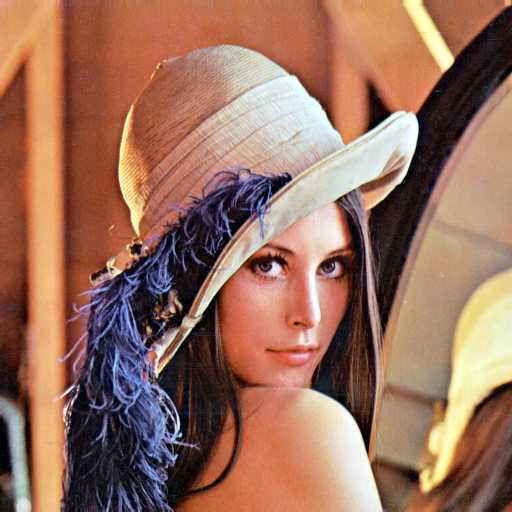

In [2]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')
cv2_imshow(img)

## Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada


In [3]:
def calculate_histogram_pixel(image):

    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    hist_red = np.zeros(256)
    hist_green = np.zeros(256)
    hist_blue = np.zeros(256)

    for color_channel in range(3):
        hist = cv.calcHist([img_rgb], [color_channel], None, [256], [0, 256])
        if color_channel == 0:
            hist_red = hist
        elif color_channel == 1:
            hist_green = hist
        elif color_channel == 2:
            hist_blue = hist

    return hist_red, hist_green, hist_blue

hist_red, hist_green, hist_blue = calculate_histogram_pixel(img)

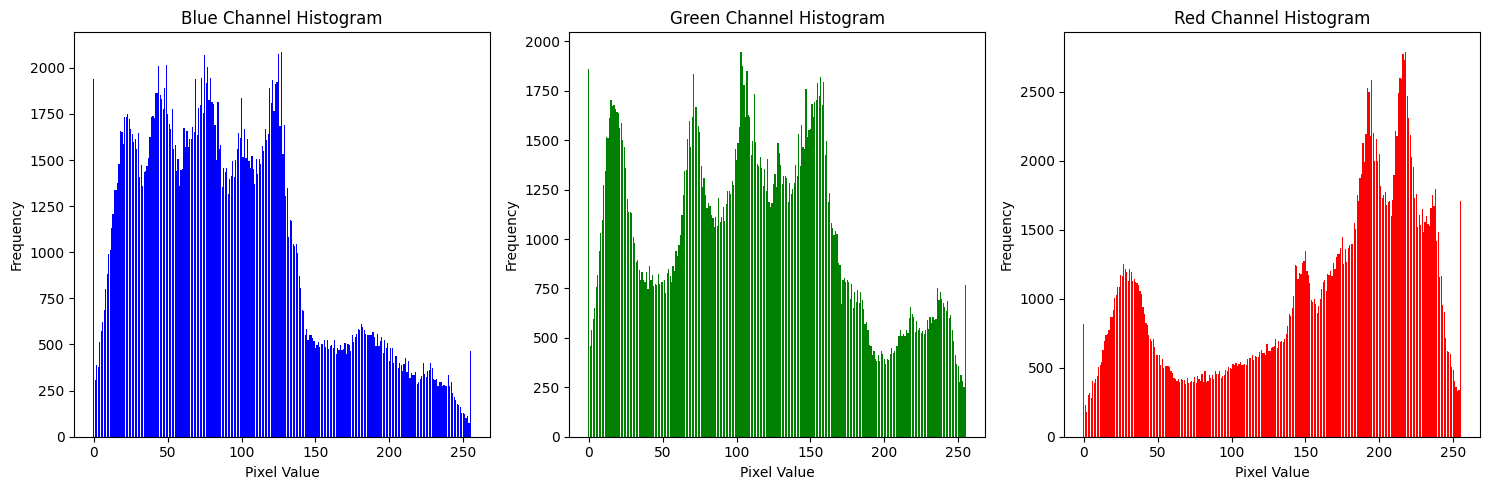

In [4]:
hist_red_flat = hist_red.flatten()
hist_green_flat = hist_green.flatten()
hist_blue_flat = hist_blue.flatten()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

x_values = np.arange(256)

ax[0].bar(x_values, hist_blue_flat, color='blue')
ax[0].set_title('Blue Channel Histogram')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

ax[1].bar(x_values, hist_green_flat, color='green')
ax[1].set_title('Green Channel Histogram')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')

ax[2].bar(x_values, hist_red_flat, color='red')
ax[2].set_title('Red Channel Histogram')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan


In [5]:
def calculate_histogram_inst(image):

    # Memisahkan channel (BGR) dari citra
    blue_channel, green_channel, red_channel = cv.split(image)

    # Menghitung histogram untuk setiap channel
    hist_blue = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
    hist_green = cv.calcHist([green_channel], [0], None, [256], [0, 256])
    hist_red = cv.calcHist([red_channel], [0], None, [256], [0, 256])

    return hist_red, hist_green, hist_blue

hist_red, hist_green, hist_blue = calculate_histogram_inst(img)

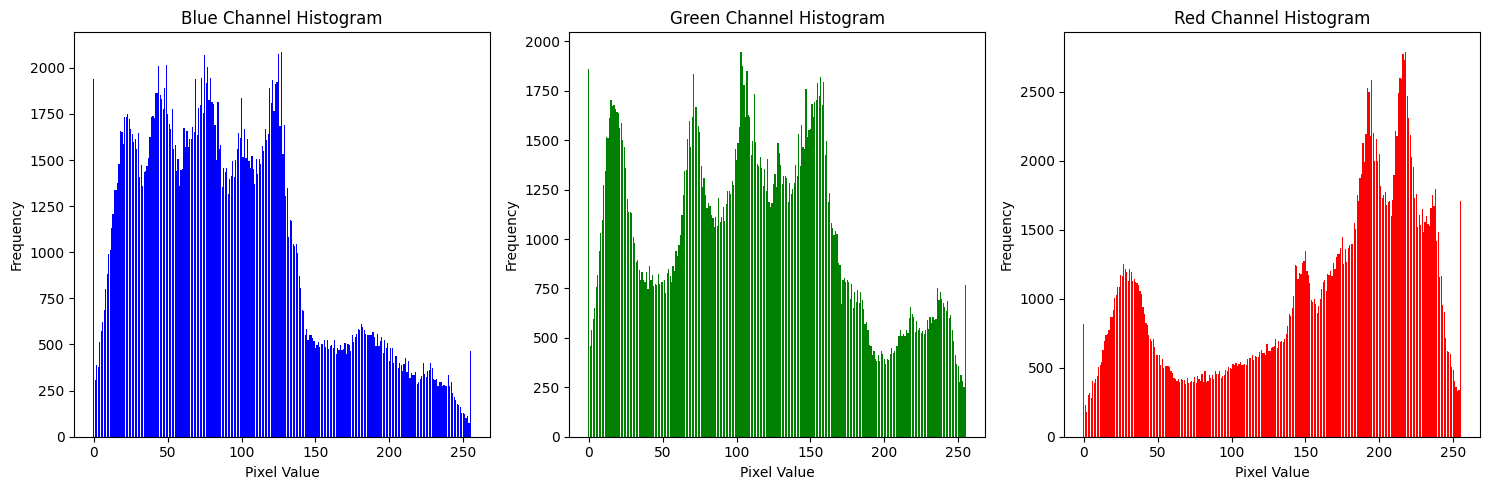

In [6]:
hist_red_flat = hist_red.flatten()
hist_green_flat = hist_green.flatten()
hist_blue_flat = hist_blue.flatten()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

x_values = np.arange(256)

ax[0].bar(x_values, hist_blue_flat, color='blue')
ax[0].set_title('Blue Channel Histogram')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

ax[1].bar(x_values, hist_green_flat, color='green')
ax[1].set_title('Green Channel Histogram')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')

ax[2].bar(x_values, hist_red_flat, color='red')
ax[2].set_title('Red Channel Histogram')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Histogram menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.


In [7]:
def numpy_histogram(image):

    # Memisahkan channel (BGR) dari citra
    blue_channel, green_channel, red_channel = cv.split(image)

    # Menghitung histogram untuk setiap channel menggunakan np.histogram
    hist_blue, _ = np.histogram(blue_channel, bins=256, range=(0, 256))
    hist_green, _ = np.histogram(green_channel, bins=256, range=(0, 256))
    hist_red, _ = np.histogram(red_channel, bins=256, range=(0, 256))

    return hist_red, hist_green, hist_blue

hist_red, hist_green, hist_blue = numpy_histogram(img)

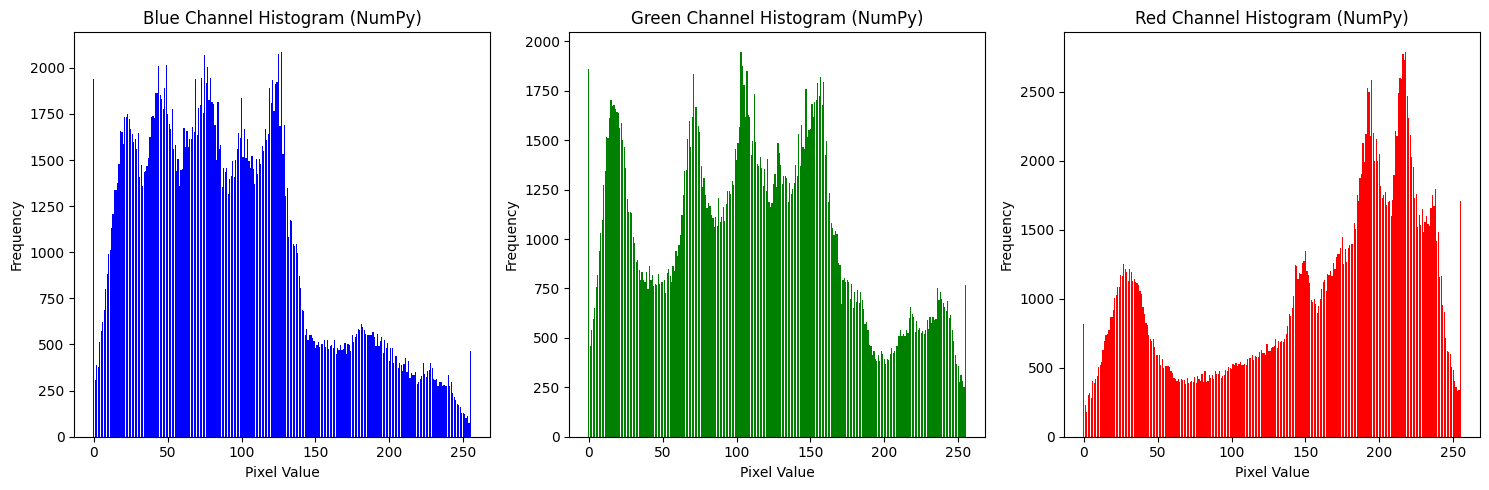

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram NumPy untuk channel Blue
ax[0].bar(np.arange(256), hist_blue, color='blue')
ax[0].set_title('Blue Channel Histogram (NumPy)')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

# Plot histogram NumPy untuk channel Green
ax[1].bar(np.arange(256), hist_green, color='green')
ax[1].set_title('Green Channel Histogram (NumPy)')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')

# Plot histogram NumPy untuk channel Red
ax[2].bar(np.arange(256), hist_red, color='red')
ax[2].set_title('Red Channel Histogram (NumPy)')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

# Menyesuaikan layout agar rapi
plt.tight_layout()
plt.show()

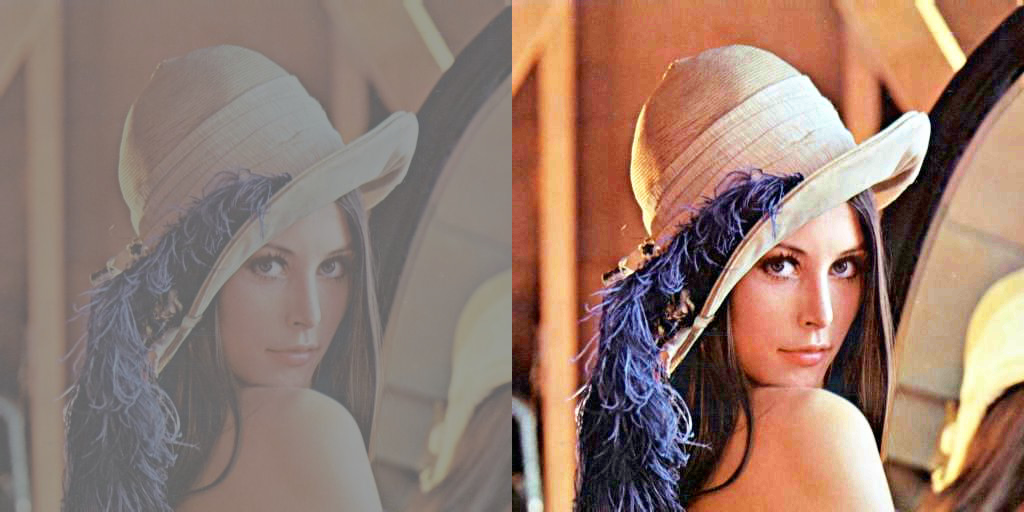

In [75]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

def count_histogram(image):
  height, width, depth = np.shape(image)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][image[y][x][0]] += 1
      ax[1][image[y][x][1]] += 1
      ax[2][image[y][x][2]] += 1
  return ax

img_histogram = count_histogram(image)

img_array = np.asarray(image)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
h_image = eq_img_array

img_eqHistogram = count_histogram(h_image)

final_frame = cv.hconcat((image, h_image))
cv2_imshow(final_frame)

<BarContainer object of 256 artists>

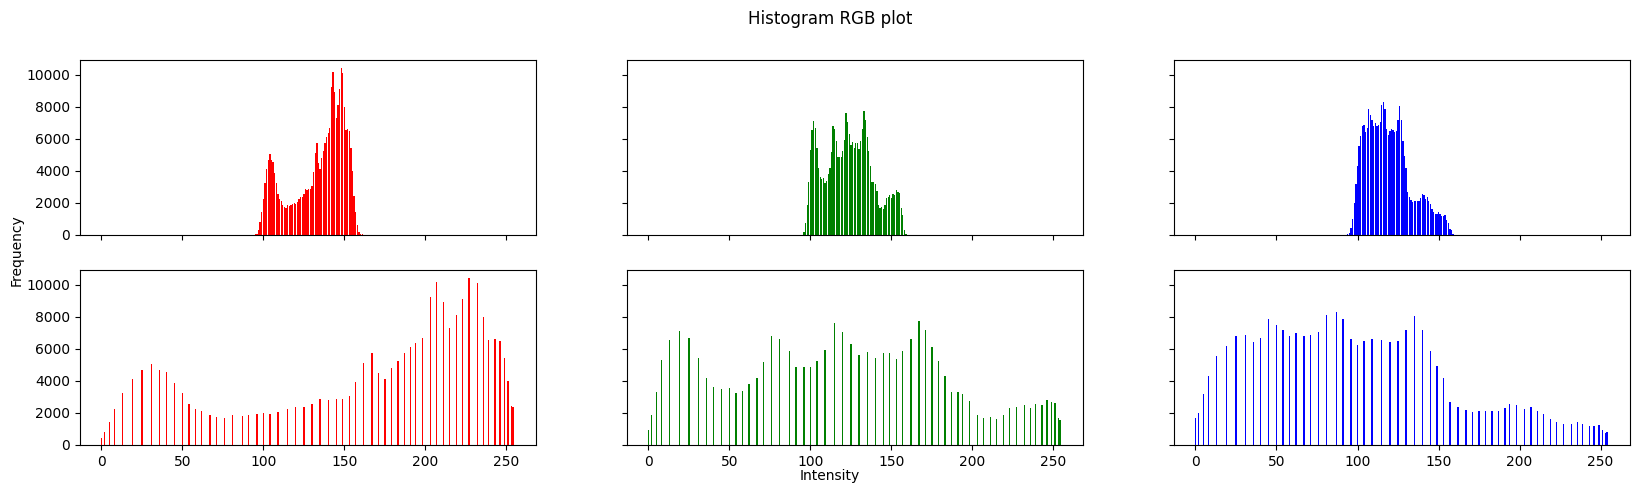

In [71]:
names = np.arange (256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensity', ha='center')
axs[0,0].bar(names, img_histogram[2], color='red')
axs[0,1].bar(names, img_histogram[1], color='green')
axs[0,2].bar(names, img_histogram[0], color='blue')
axs[1,0].bar(names, img_eqHistogram[2], color='red')
axs[1,1].bar(names, img_eqHistogram[1], color='green')
axs[1,2].bar(names, img_eqHistogram[0], color='blue')

## Histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.

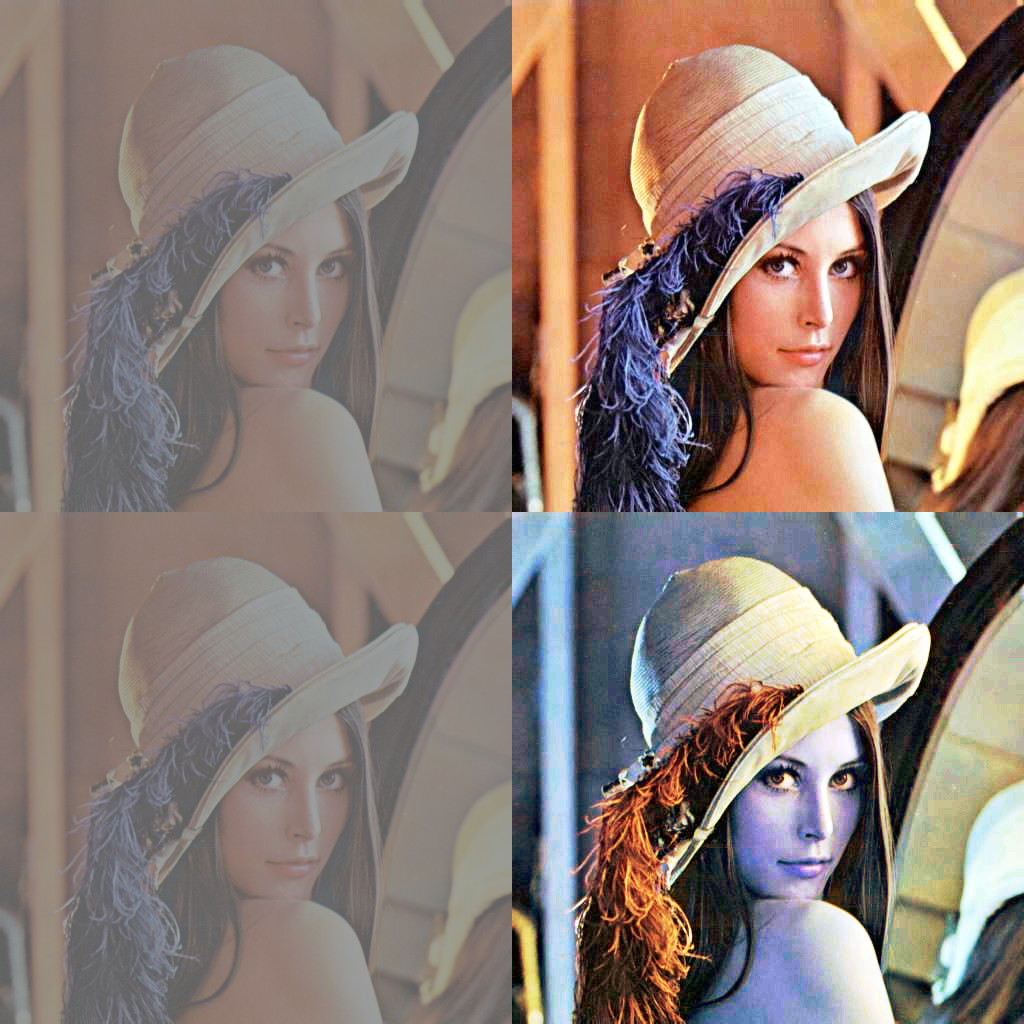

In [80]:
r, g, b = cv.split(image)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

h_image = cv.merge((b_eq, g_eq, r_eq))

img_eqHistogram = count_histogram(h_image)

cv_frame = cv.hconcat((image, h_image))
final_frame1 = cv.vconcat((final_frame, cv_frame))
cv2_imshow(final_frame1)

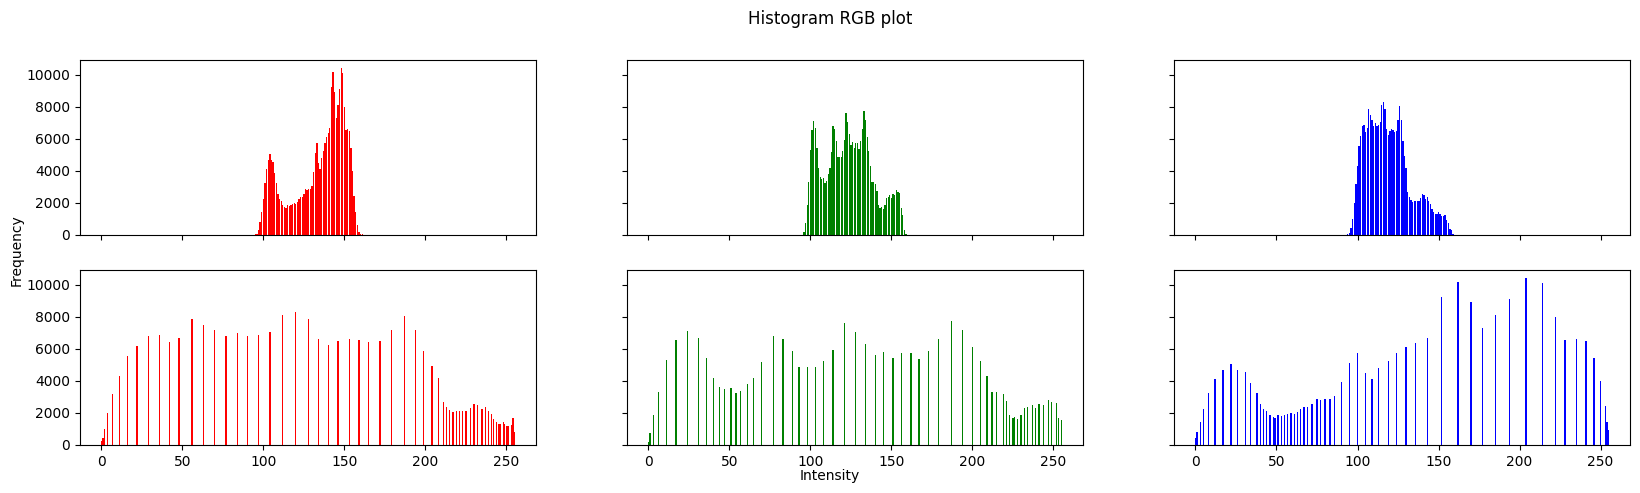

In [83]:
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensity', ha='center')
axs[0, 0].bar(names, img_histogram[2], color='red')
axs[0, 1].bar(names, img_histogram[1], color='green')
axs[0, 2].bar(names, img_histogram[0], color='blue')
axs[1, 0].bar(names, img_eqHistogram[2], color='red')
axs[1, 1].bar(names, img_eqHistogram[1], color='green')
axs[1, 2].bar(names, img_eqHistogram[0], color='blue')
plt.show()

## Pemetaan 16 juta warna RGB ke dalam 8 warna, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output

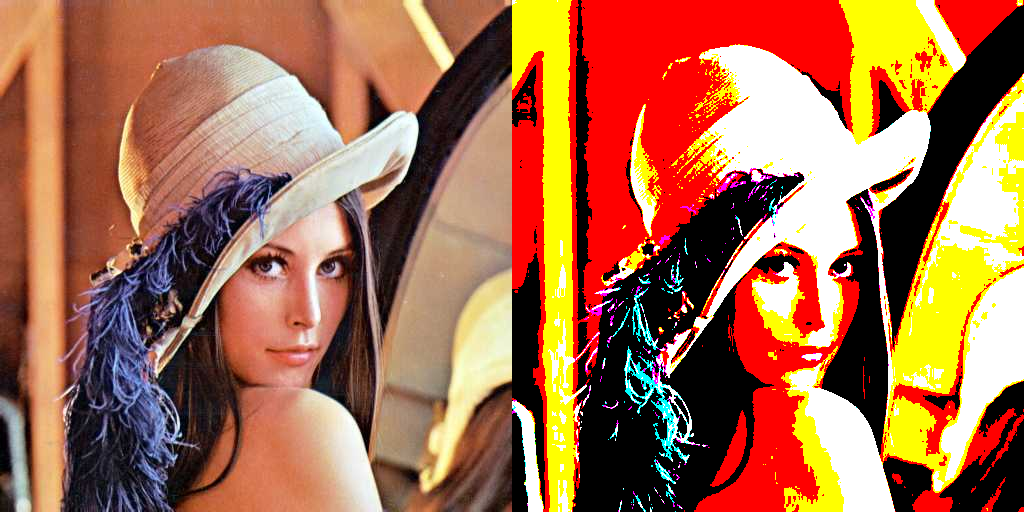

In [85]:
colors = np.array([
    [0, 0, 0],
    [0, 255, 0],
    [255, 255, 0],
    [0, 0, 255],
    [0, 255, 255],
    [255, 0, 255],
    [255, 255, 255],
])

def euclidean_distance(c1, c2):
    return np.sqrt(np.sum((c1 - c2)**2))

def map_to_8_colors(image):
    height, width, _ = image.shape
    mapped_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            distances = [euclidean_distance(pixel, color) for color in colors]
            mapped_image[y, x] = colors[np.argmin(distances)]

    return mapped_image

image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')

mapped_image = map_to_8_colors(image)

final_frame = cv.hconcat((image, mapped_image))
cv2_imshow(final_frame)

##  Dithering Floyd and Steinberg

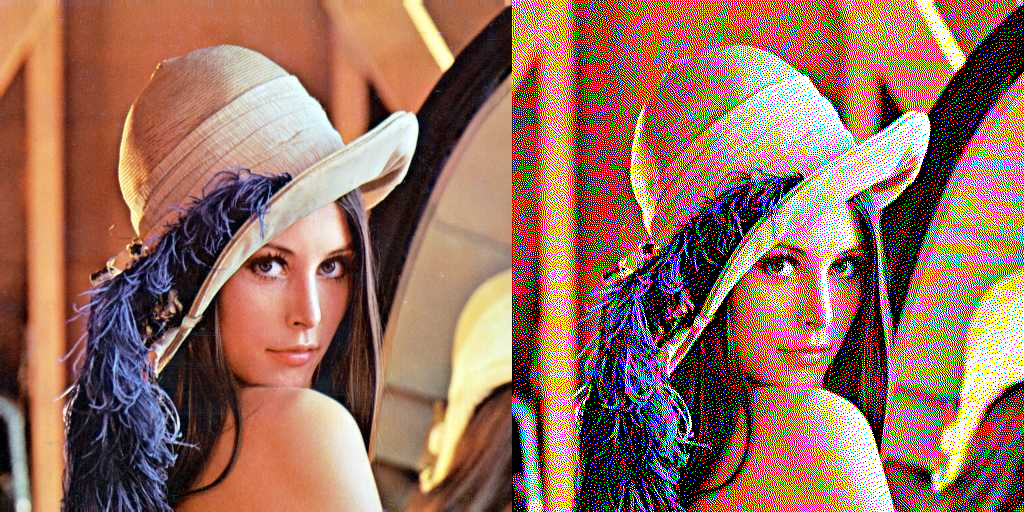

In [89]:
def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    return value

def floyd_steinberg_dithering(image):
    height, width, _ = image.shape

    dithered_image = np.copy(image)

    for y in range(height):
        for x in range(width):

            pixelBlueOld = dithered_image[y, x, 0]
            pixelGreenOld = dithered_image[y, x, 1]
            pixelRedOld = dithered_image[y, x, 2]

            jarakPixel = 1

            pixelBlueNew = np.round(jarakPixel * pixelBlueOld / 255.0) * (255 / jarakPixel)
            pixelGreenNew = np.round(jarakPixel * pixelGreenOld / 255.0) * (255 / jarakPixel)
            pixelRedNew = np.round(jarakPixel * pixelRedOld / 255.0) * (255 / jarakPixel)

            dithered_image[y, x, 0] = threshold(pixelBlueNew)
            dithered_image[y, x, 1] = threshold(pixelGreenNew)
            dithered_image[y, x, 2] = threshold(pixelRedNew)

            errorBlue = pixelBlueOld - pixelBlueNew
            errorGreen = pixelGreenOld - pixelGreenNew
            errorRed = pixelRedOld - pixelRedNew

            if x + 1 < width:
                dithered_image[y, x + 1, 0] = threshold(dithered_image[y, x + 1, 0] + errorBlue * 7 / 16)
                dithered_image[y, x + 1, 1] = threshold(dithered_image[y, x + 1, 1] + errorGreen * 7 / 16)
                dithered_image[y, x + 1, 2] = threshold(dithered_image[y, x + 1, 2] + errorRed * 7 / 16)

            if y + 1 < height and x - 1 >= 0:
                dithered_image[y + 1, x - 1, 0] = threshold(dithered_image[y + 1, x - 1, 0] + errorBlue * 3 / 16)
                dithered_image[y + 1, x - 1, 1] = threshold(dithered_image[y + 1, x - 1, 1] + errorGreen * 3 / 16)
                dithered_image[y + 1, x - 1, 2] = threshold(dithered_image[y + 1, x - 1, 2] + errorRed * 3 / 16)

            if y + 1 < height:
                dithered_image[y + 1, x, 0] = threshold(dithered_image[y + 1, x, 0] + errorBlue * 5 / 16)
                dithered_image[y + 1, x, 1] = threshold(dithered_image[y + 1, x, 1] + errorGreen * 5 / 16)
                dithered_image[y + 1, x, 2] = threshold(dithered_image[y + 1, x, 2] + errorRed * 5 / 16)

            if y + 1 < height and x + 1 < width:
                dithered_image[y + 1, x + 1, 0] = threshold(dithered_image[y + 1, x + 1, 0] + errorBlue * 1 / 16)
                dithered_image[y + 1, x + 1, 1] = threshold(dithered_image[y + 1, x + 1, 1] + errorGreen * 1 / 16)
                dithered_image[y + 1, x + 1, 2] = threshold(dithered_image[y + 1, x + 1, 2] + errorRed * 1 / 16)

    return dithered_image

image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena.jpg')

dithered_image = floyd_steinberg_dithering(image)

final_frame = cv.hconcat((image, dithered_image))
cv2_imshow(final_frame)

## Histogram Equalization & Dithering Floyd dan Steinberg

<ipython-input-99-18a17eeaa818>:14: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 550 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  dithered_image[y, x] = new_pixel


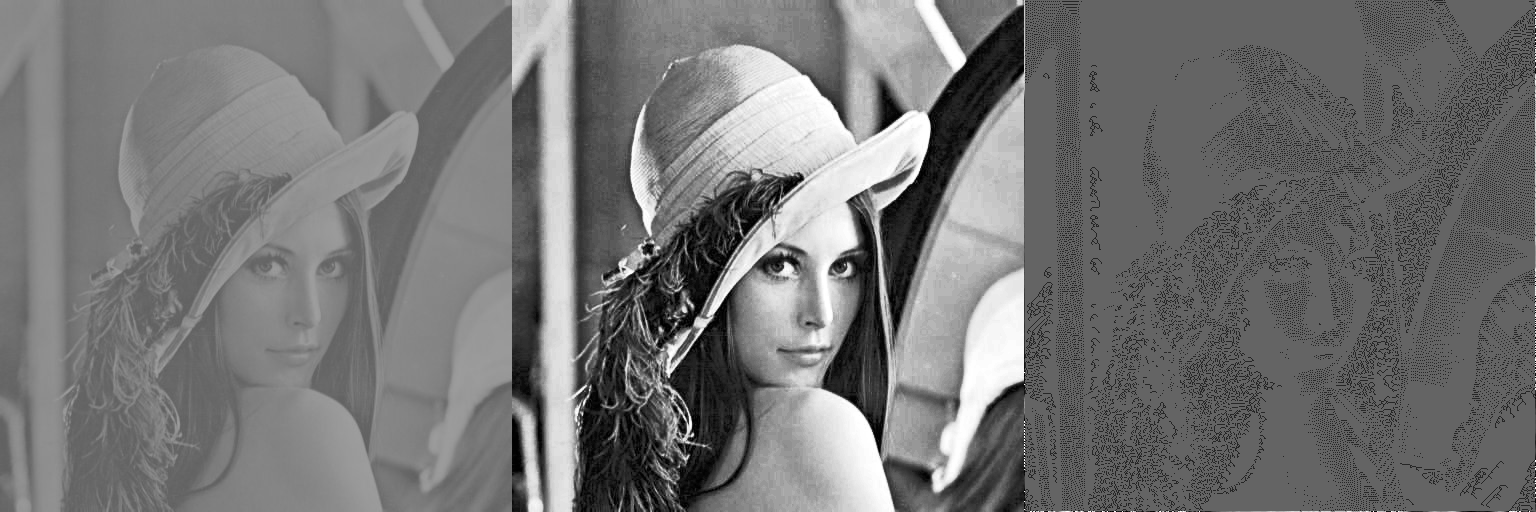

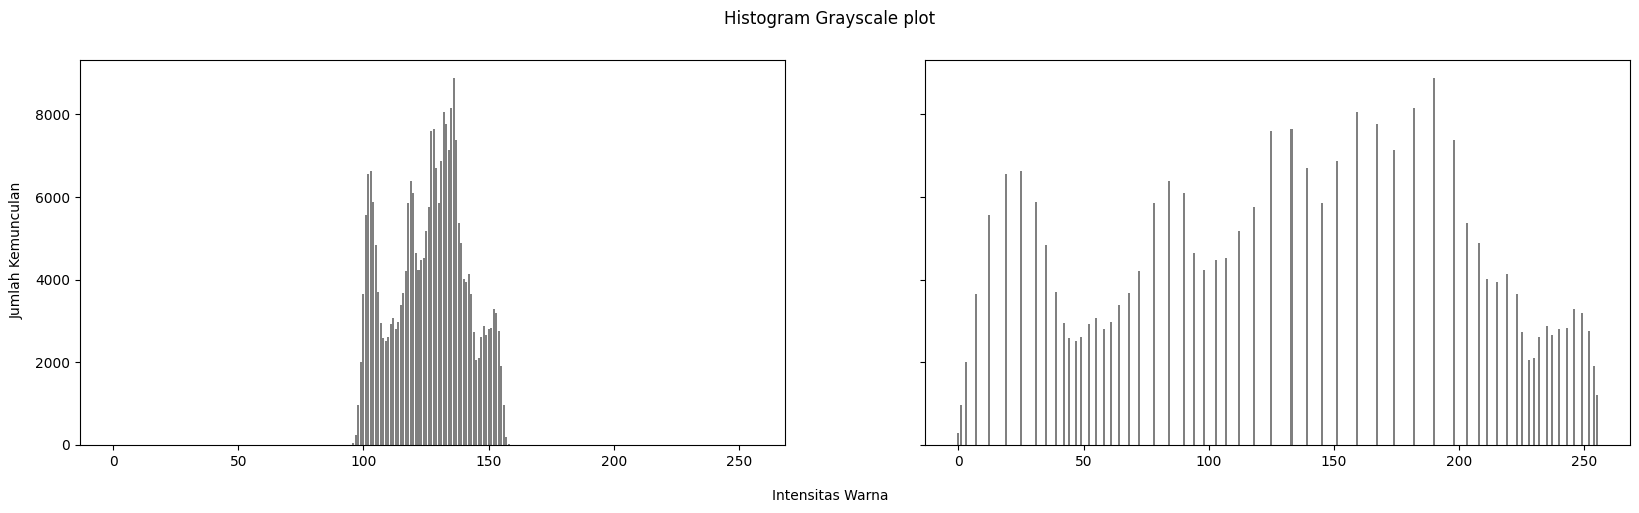

In [99]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

equalized_image = cv.equalizeHist(image)

height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')


final_frame = cv.hconcat((image, equalized_image, dithered_image))
cv2_imshow(final_frame)